# Анализ рекламной кампании развлекательного приложения Procrastinate Pro+

<a id="start"></a>
### Описание проекта

Проводится маркетинговое аналитическое исследование для развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Список изучаемых показателей и факторов:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### Загрузка и подготовка данных

Начнем с загрузки датасетов и их изучения для последующего приведения к единообразному виду

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import plotly.express as px
from plotly import graph_objects as go 

visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'),  # журнал сессий
    pd.read_csv('orders_info_short.csv'),  # покупки
    pd.read_csv('costs_info_short.csv'),  # траты на рекламу
)
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [2]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [3]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В первую очередь приведем названия колонок к единому виду ("змеиному регистру")

In [4]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns]
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Теперь переведем столбцы с датой и временем событий во всех трех датасетах в правильный формат.

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [8]:
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

Теперь изучим датасеты на наличие пропусков в каждом из них.

In [9]:
visits.isna().sum()
orders.isna().sum()
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

Пропусков нет - уже отлично. Это значит, что, как минимум, не нужно исключать данные из исследования ввиду их неполноценности.

Изучим, какие значения встречаются в датасетах (кроме дат) на предмет их корректной записи, наличия опечаток, ошибок, похожих названий, написанных по-разному, и так далее.

In [10]:
visits['user_id'].value_counts()

33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
214203066007     1
369265191867     1
346271445800     1
133742530598     1
279181973476     1
Name: user_id, Length: 150008, dtype: int64

In [11]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [12]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [13]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [14]:
costs['channel'].value_counts()

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

Итого неправильных записей нет, задвоенных записей нет, источники рекламного трафика полностью соотносятся друг с другом.
Также уже ясно распределение пользователей по странам, устройствам, а также видны пользователи, которые активно пользуются сервисом.

Перейдем к анализу имеющихся данных.

### Прописывание функций для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания пользовательских профилей

In [15]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

#### Функция для расчёта удержания

In [16]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для расчёта конверсии

In [17]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для расчёта LTV и ROI

In [18]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция для сглаживания фрейма

In [19]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция для визуализации удержания

In [20]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Функция для визуализации конверсии

In [21]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для визуализации LTV и ROI

In [22]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Поскольку поставленная задача допускает использование уже имеющихся написанных функций - их и применим. В случае с функцией профилей - не используем часть функции с "событиями", поскольку таковых в исследуемых данных нет.

### Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [23]:
profiles = get_profiles(visits, orders,costs)
profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [24]:
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

In [25]:
profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

Самый первый пользователь зарегистрировался в сервисе 1 мая 2019 года, а самый последний - 27 октября 2019 года.

Итого, между регистрациями первого и последнего пользователя прошло ровно 180 дней.

Принимая во внимание условие, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения, делаем вывод о том, что выгрузка данных сформирована корректно и в горизонт анализа попадают практически все даты регистрации и событий пользователей.

Таким образом, горизонт анализа будет равен 14 дням, а последняя дата регистрации релевантного пользователя - 13 октября 2019 года.

In [26]:
horizon = 14
observation_date = datetime(2019, 10, 13).date()

#### Распределение пользователей по регионам и устройствам

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны. Дополнительно рассмотрим, какие устройства используют клиенты.

Для начала изучим общее количество пользователей и долю платящих из общего числа.

In [27]:
payers_all = profiles.pivot_table(index=['region','payer'],values='user_id',aggfunc='nunique').reset_index()
payers_all.columns=['region', 'payer', 'count']
payers_all

region  payer  count
0         France  False  16787
1         France   True    663
2        Germany  False  14365
3        Germany   True    616
4             UK  False  16875
5             UK   True    700
6  United States  False  93100
7  United States   True   6902

In [28]:
def cat_payer(row):
    chain = row['payer']
    
    if chain == True:
        return 'Платят'
    else:
        return 'Не платят'
    
payers_all['payer'] = payers_all.apply(cat_payer, axis=1)


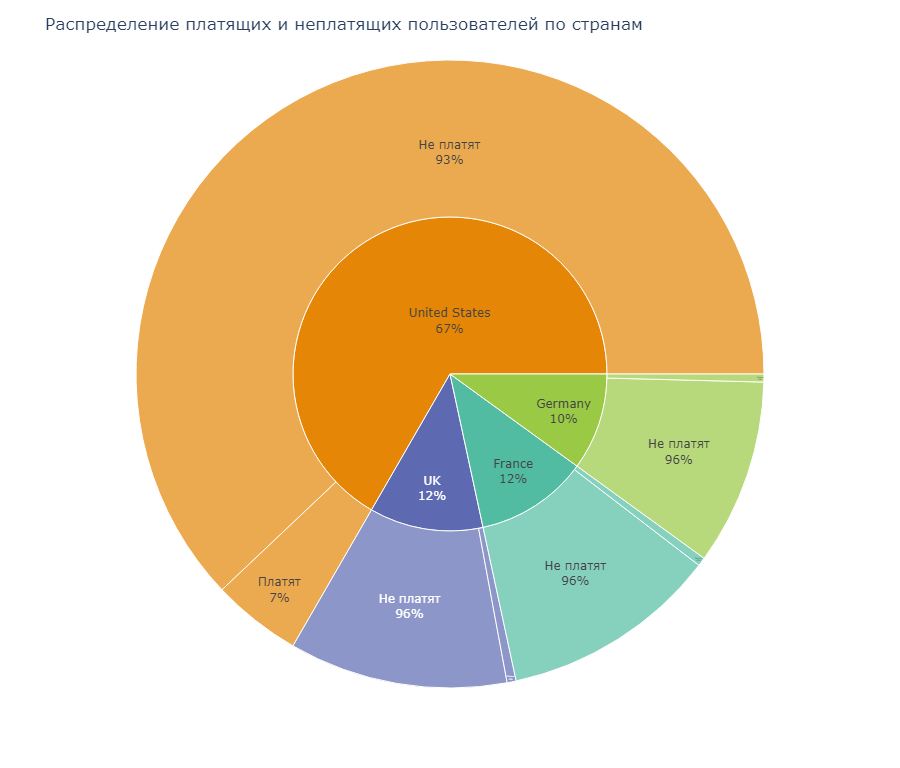

In [29]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
fig = px.sunburst(payers_all, path=['region', 'payer'], values='count', color_discrete_sequence=px.colors.qualitative.Vivid)



fig.update_layout(title='Распределение платящих и неплатящих пользователей по странам',
                  width=900,
                  height=768)
fig.update_traces(textinfo='label+percent parent', insidetextorientation='horizontal')
fig.show("png")

Из общего количества пользователей 67% или 2/3 от общего числа - пользователи из США. На Великобританию, Германию и Францию приходится по 10-12%.

Доля платящих от общего числа предельно мала: по 4% для Старого Света и 7% (практически в два раза больше) для США.

В целом показатель неплохой, и в рамках анализа путей развития сервиса необходимо будет задумываться о том, как увеличить долю приносящих доход пользователей.

Теперь изучим отдельно только платящих пользователей.

In [30]:
payers = profiles.query('payer == True')
payers.head(5)

user_id            first_ts     channel   device         region  \
0       599326 2019-05-07 20:58:57    FaceBoom      Mac  United States   
7     46006712 2019-06-30 03:46:29  AdNonSense  Android         France   
61   374052872 2019-08-08 15:42:57      TipTop      Mac  United States   
71   414791703 2019-05-03 12:01:28      TipTop   iPhone  United States   
124  785077127 2019-06-27 08:31:39      TipTop      Mac  United States   

             dt      month  payer  acquisition_cost  
0    2019-05-07 2019-05-01   True          1.088172  
7    2019-06-30 2019-06-01   True          1.008000  
61   2019-08-08 2019-08-01   True          2.972222  
71   2019-05-03 2019-05-01   True          1.049180  
124  2019-06-27 2019-06-01   True          2.539062

Для исследования сформируем сводную таьблицу для изучения распределения пользователей по регионам, а также по используемым ими устройствам.

In [31]:
payers_pivot=payers.pivot_table(index=['region','device'],values='user_id',aggfunc='nunique').reset_index()
payers_pivot.columns=['region', 'device', 'count']
payers_pivot

region   device  count
0          France  Android    179
1          France      Mac     82
2          France       PC    268
3          France   iPhone    134
4         Germany  Android    182
5         Germany      Mac     61
6         Germany       PC    253
7         Germany   iPhone    120
8              UK  Android    202
9              UK      Mac     63
10             UK       PC    301
11             UK   iPhone    134
12  United States  Android   1487
13  United States      Mac   1706
14  United States       PC    715
15  United States   iPhone   2994

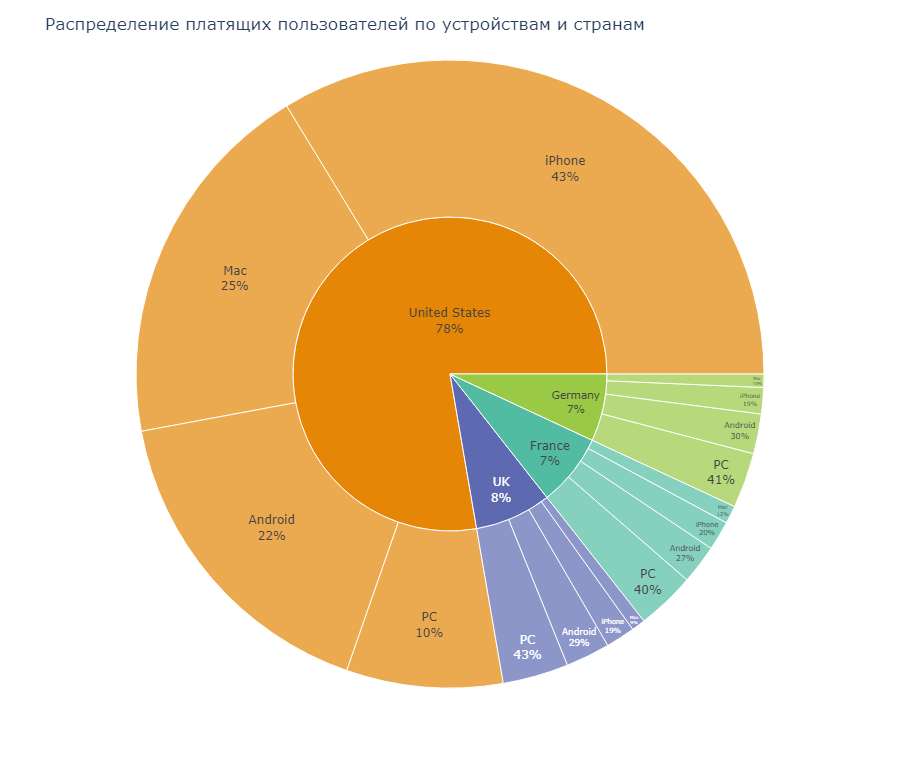

In [32]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
fig = px.sunburst(payers_pivot, path=['region', 'device'], values='count', color_discrete_sequence=px.colors.qualitative.Vivid)



fig.update_layout(title='Распределение платящих пользователей по устройствам и странам',
                  width=900,
                  height=768)
fig.update_traces(textinfo='label+percent parent', insidetextorientation='horizontal')
fig.show("png")

На графике наглядно видно, что более 3/4 платящих пользователей приложения из США, причем более 50% из них - пользователи устройств Apple. Остальные регионы - Великобритания, Германия и Франция, - составляют по 7-8 процентов от общего числа пользователей, и в них от 40 до 43 процентов платящих пользователей пользуются ПК, от 27 до 30% - пользуются устройствами на базе Android. Это обусловлено, скорее всего, тем, что устройства Apple позиционируются как "status symbol", а страны "Старого Света" склонны более рационально и бережливо расходовать свои средства, и поэтому для них выгоднее и экономнее купить ПК или телефон на Android, чем тратить деньги на дорогие "яблоки".

Для наглядности также построим аналогичную сводную таблицу и диаграмму для всех пользователей, без разделения их на платящих и неплатящих.

In [33]:
profiles_pivot=profiles.pivot_table(index=['region','device'],values='user_id',aggfunc='nunique').reset_index()
profiles_pivot.columns=['region', 'device', 'count']
profiles_pivot

region   device  count
0          France  Android   5252
1          France      Mac   1838
2          France       PC   6940
3          France   iPhone   3420
4         Germany  Android   4440
5         Germany      Mac   1584
6         Germany       PC   5945
7         Germany   iPhone   3012
8              UK  Android   5141
9              UK      Mac   1778
10             UK       PC   7138
11             UK   iPhone   3518
12  United States  Android  20199
13  United States      Mac  24842
14  United States       PC  10432
15  United States   iPhone  44529

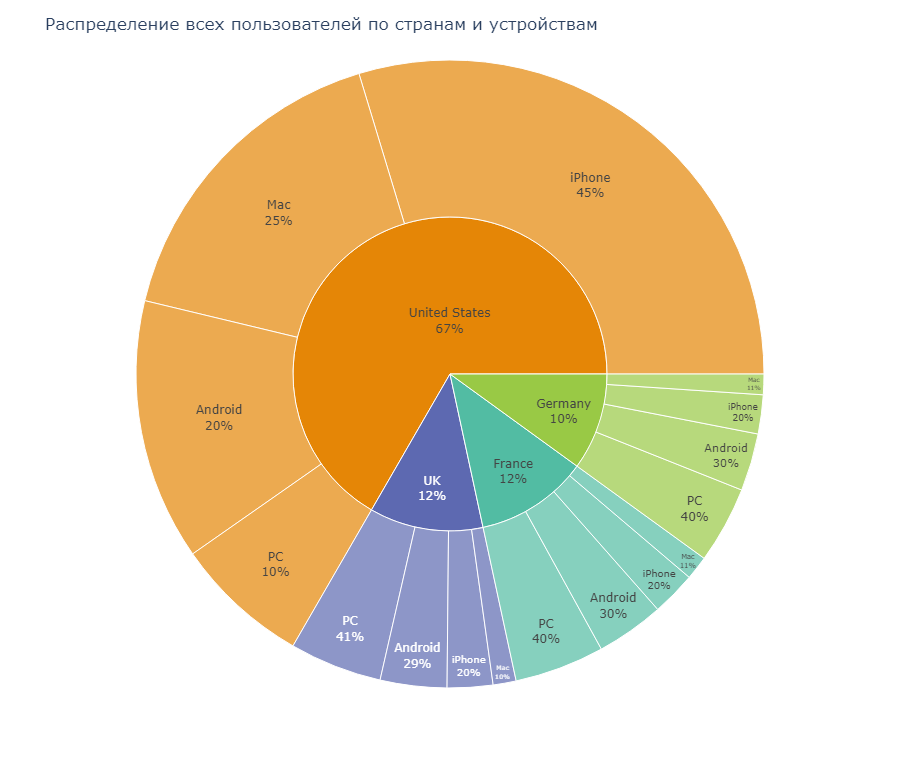

In [34]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
fig = px.sunburst(profiles_pivot, path=['region', 'device'], values='count', color_discrete_sequence=px.colors.qualitative.Vivid)



fig.update_layout(title='Распределение всех пользователей по странам и устройствам',
                  width=900,
                  height=768)
fig.update_traces(textinfo='label+percent parent', insidetextorientation='horizontal')
fig.show("png")

В целом картина по всему пулу пользователей практически не меняется - две трети пользователей все так же из США, и на пользователей Apple приходится 70% всех клиентов из страны. Великобритания, Германия и Франция в распределении по всем пользователям и их устройствам идентичны - 70%, в отличие от США, не используют Apple, а на каждую из стран приходится от 10 до 12 процентов от общего количества клиентов.

#### Распределение пользователей по источникам рекламы

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения, а также соответствующие диаграммы.

In [35]:
ads_pivot=payers.pivot_table(index=['channel'],values='user_id',aggfunc='nunique').reset_index()
ads_pivot.columns=['channel', 'count']
ads_pivot

channel  count
0           AdNonSense    440
1             FaceBoom   3557
2              LeapBob    262
3         MediaTornado    156
4   OppleCreativeMedia    233
5       RocketSuperAds    352
6               TipTop   1878
7       WahooNetBanner    453
8              YRabbit    165
9       lambdaMediaAds    225
10             organic   1160

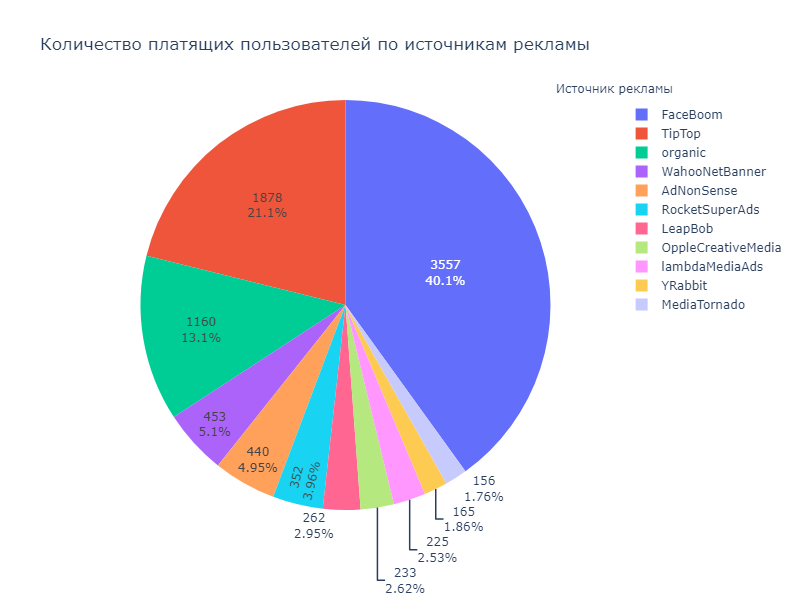

In [36]:
fig = go.Figure(data=[go.Pie(labels=ads_pivot['channel'], values=ads_pivot['count'])])
fig.update_layout(title='Количество платящих пользователей по источникам рекламы', 
                  width=800, 
                  height=600,
                  annotations=[dict(x=1.12, 
                                    y=1.05,
                                    text='Источник рекламы',
                                    showarrow=False)])
fig.update_traces(textinfo='percent+value')
fig.show("png")

На диаграмме наглядно видно, что 40% всех платящих пользователей привлечено рекламой FaceBoom, на втором месте TipTop (21.1%), и на третьем месте - органические пользователи, то есть, те люди, которые сами нашли сервис. Такое количество органических пользователей не так уж и высоко, но, как минимум, показывает факт того, что сервис востребован даже у тех, кто на рекламу не обращает внимание.

Аналогично рассмотрим всех привлеченных пользователей, но также отразим долю платящих и неплатящих по источникам рекламы.

In [37]:
ads_gen_pivot=profiles.pivot_table(index=['channel','payer'],values='user_id',aggfunc='nunique').reset_index()
ads_gen_pivot.columns=['channel', 'payer', 'count']
ads_gen_pivot

channel  payer  count
0           AdNonSense  False   3440
1           AdNonSense   True    440
2             FaceBoom  False  25587
3             FaceBoom   True   3557
4              LeapBob  False   8291
5              LeapBob   True    262
6         MediaTornado  False   4208
7         MediaTornado   True    156
8   OppleCreativeMedia  False   8372
9   OppleCreativeMedia   True    233
10      RocketSuperAds  False   4096
11      RocketSuperAds   True    352
12              TipTop  False  17683
13              TipTop   True   1878
14      WahooNetBanner  False   8100
15      WahooNetBanner   True    453
16             YRabbit  False   4147
17             YRabbit   True    165
18      lambdaMediaAds  False   1924
19      lambdaMediaAds   True    225
20             organic  False  55279
21             organic   True   1160

In [38]:
def cat_payer(row):
    chain = row['payer']
    
    if chain == True:
        return 'Платят'
    else:
        return 'Не платят'
    
ads_gen_pivot['payer'] = ads_gen_pivot.apply(cat_payer, axis=1)


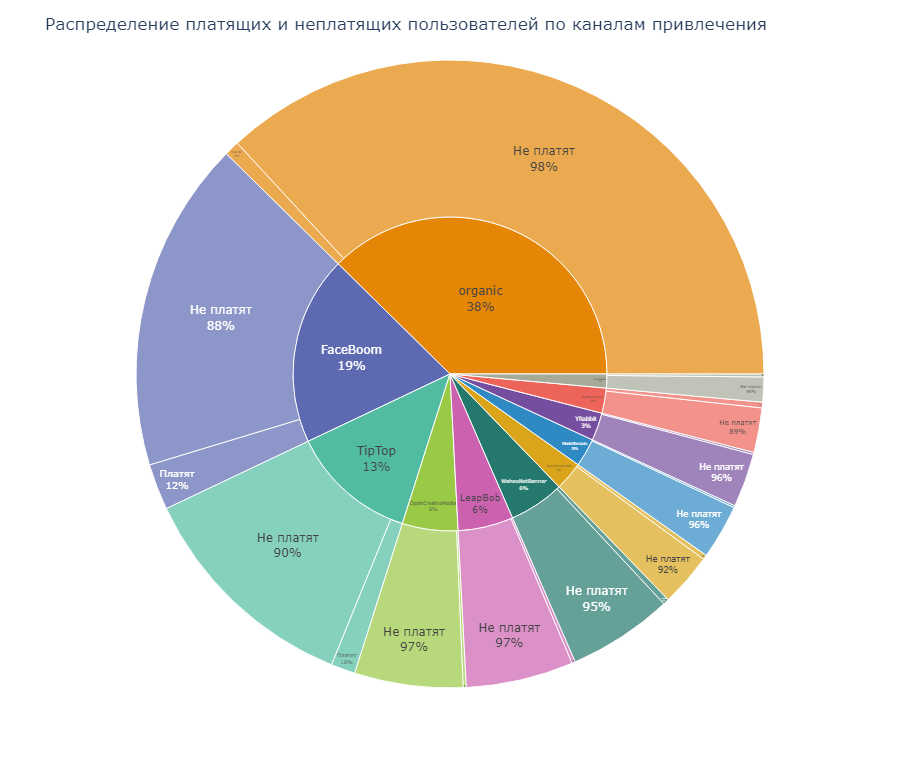

In [39]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
fig = px.sunburst(ads_gen_pivot, path=['channel', 'payer'], values='count', color_discrete_sequence=px.colors.qualitative.Vivid)



fig.update_layout(title='Распределение платящих и неплатящих пользователей по каналам привлечения',
                  width=900,
                  height=768)
fig.update_traces(textinfo='label+percent parent', insidetextorientation='horizontal')
fig.show("png")

Теперь общая картина становится совершенно другой. 38% (немногим более 56 тысяч) пользователей - органические, то есть, нашедшие сервис самостоятельно. Из них платят только 2% (всего 1160 человек), что, конечно, не совсем плохо, но и далеко не хорошо. 

Пришедшие по рекламе из FaceBoom и заплатившие составляют всего 12% (3557 человек) от общего числа 29144 человек, привлеченных по данному источнику.

Реклама в TipTop привлекла 19561 человека в сервис, но из всех привлеченных покупку совершили всего 10% (1878 человек).

По остальным источникам привлечено от 1 до 6% пользователей, из которых около 90% по каждому источнику не совершили покупку в сервисе.

#### Выводы

По итогам проведенного исследовательского анализа, можно, подытоживая, сказать, что:

1. Более 2/3 всех пользователей сервиса - из США и среди них более 3/4 используют устройства Apple.
2. На страны Старого Света приходится по 10-12% от общего числа пользователей, и в этих странах около 70% *не* используют устройства Apple
3. Больше всего привлечено органических пользователей, а также по каналам FaceBoom и TipTop.
4. Больше всего платящих пользователей привлечено в FaceBoom и TipTop.
5. Общая картина распределения привлеченных пользователей и доля платящих среди них говорят о том, что сервис востребован, но покупок совершается мало, а это может быть причиной либо некорректного маркетинга, либо иных проблем.

### Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

#### Общие расходы на маркетинг

Сумму расходов на маркетинг посчитаем, найдя сумму из датафрейма costs по столбцу с затратами на рекламу.

In [40]:
ad_sum = np.around(costs['costs'].sum(),decimals = 2)
print('Общие затраты на рекламу:',ad_sum, 'долларов США')

Общие затраты на рекламу: 105497.3 долларов США


Теперь построим сводную таблицу по источникам рекламы и затратам на нее.

In [41]:
ad_costs = costs.pivot_table(index='channel', values='costs', aggfunc='sum').reset_index()
ad_costs.sort_values(by='costs', ascending=False)

channel     costs
6              TipTop  54751.30
1            FaceBoom  32445.60
7      WahooNetBanner   5151.00
0          AdNonSense   3911.25
4  OppleCreativeMedia   2151.25
5      RocketSuperAds   1833.00
2             LeapBob   1797.60
9      lambdaMediaAds   1557.60
3        MediaTornado    954.48
8             YRabbit    944.22

Самой затратной оказалась реклама в TipTop, на втором месте - FaceBoom, но если обратиться к ранее рассматривавшимся диаграммам с долей привлеченных пользователей, оказывается, что самая дорогая реклама привлекла на 10 тыс. человек меньше, будучи при этом на 20 тысяч долларов дороже. 

*Это еще один фактор, указывающий на некорректный выбор рекламной политики*

#### Динамика затрат по времени

Изучим динамику изменения затрат на рекламу по каналам привлечения.

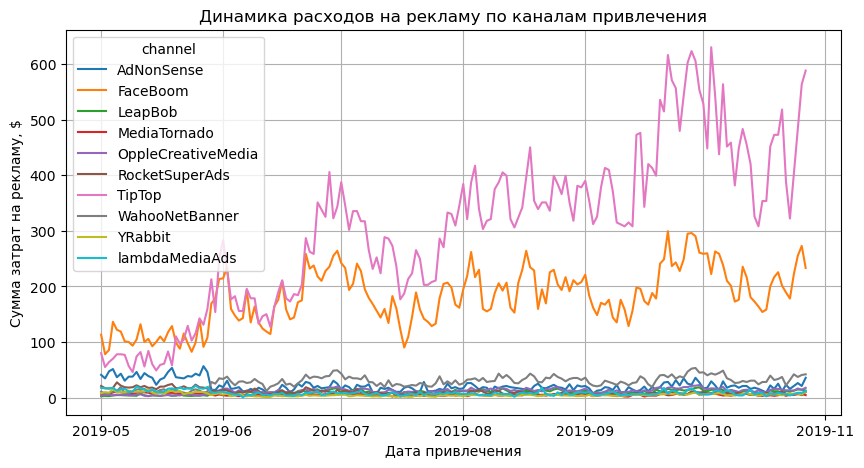

In [42]:
costs.pivot_table(
    index='dt', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Сумма затрат на рекламу, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов на рекламу по каналам привлечения')
plt.show()

Очень интересно заметить, что до середины июня стоимость рекламы по двум основным каналам - FaceBoom и TipTop изменялась примерно одинаково, но затем разрыв стал увеличиваться, и к началу октября один день рекламы в TipTop стал стоить в два раза выше, чем в FaceBoom. Скорее всего, отделом маркетинга было принято решение увеличить число показов в сети TipTop, что повлекло за собой рост стоимости привлечения без соответствующего количества привлеченных пользователей.

Дополнительно посмотрим динамику изменения стоимости привлечения пользователей.

#### Средняя стоимость привлечения пользователей по рекламной сети

Изучим динамику изменения стоимости привлечения пользователей в разрезе каждой рекламной сети во времени.

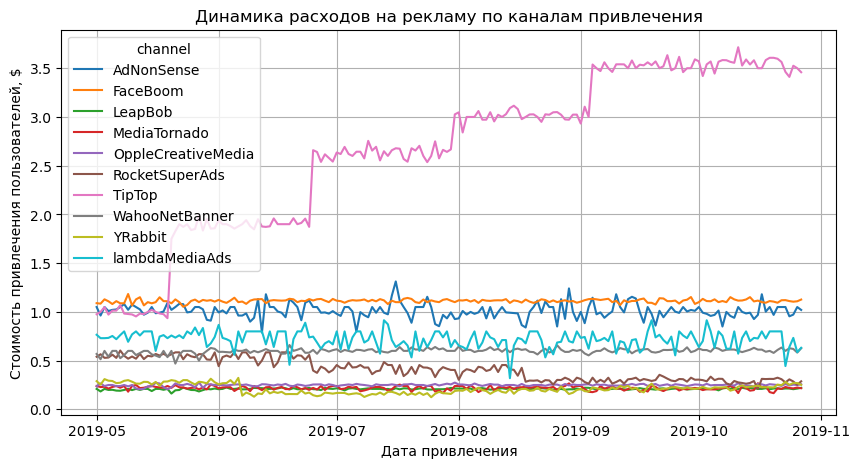

In [43]:
profiles.query('channel != "organic"').pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Стоимость привлечения пользователей, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов на рекламу по каналам привлечения')
plt.show()

На этом графике изменение средней стоимости привлечения пользователя в сети TipTop показывает, что с течением времени показатель увеличивался каждый месяц на 1 доллар, достигнув максимума в размере $3,5 в сентябре. 

При прочих равных условиях, причин здесь может быть всего три:
1. Реклама в TipTop стала меньше привлекать пользователей ("приелась" зрителю)
2. Отделом маркетинга была выбрана неверная стратегия и закуплено б**о**льшее число показов в сети TipTop
3. Сеть TipTop изменила стоимость рекламы.

#### Выводы

Исследование распределения рекламных расходов показало, что на сеть TipTop тратилось неоправданно больше средств, чем в итоге было привлечено пользователей, что платящих, что нет. По неизвестной причине стоимость рекламной кампании в данной сети увеличивалась с течением времени вместе со средней стоимостью привлечения пользователя.

Возможно, это было связано с некорректной рекламной политикой заказчика, ориентированной на сеть TipTop, либо с ценовой политикой самой сети. Более детально в данном разрезе можно было бы изучить данные, если бы имелись сведения о количестве рекламных показов, стоимости показа, а также выбранной модели оплаты рекламы.

Также есть большая вероятность, что реклама в сети сама по себе оказалась непривлекательной, либо ориентированной на сегмент пользователей, недостаточно широко представленный в TipTop. Однако более детальной информации, подтверждающей или опровергающей это нет.

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

В свете того, что мы исследуем именно рекламные расходы и эффективность рекламы, перед началом исследования исключим "органических" пользователей, за привлечение и покупки которых никаких денег не платится, а доход от них идет. В рамках данного исследования будем считать доход от их существования "несгораемой суммой".

In [44]:
profiles = profiles.query('channel != "organic"')

#### Оценка маркетинговых показателей рекламных пользователей

Имея "очищенные" от органического трафика данные, проведем исследование маркетинговых показателей пользователей, привлеченных именно рекламой в различных источниках.

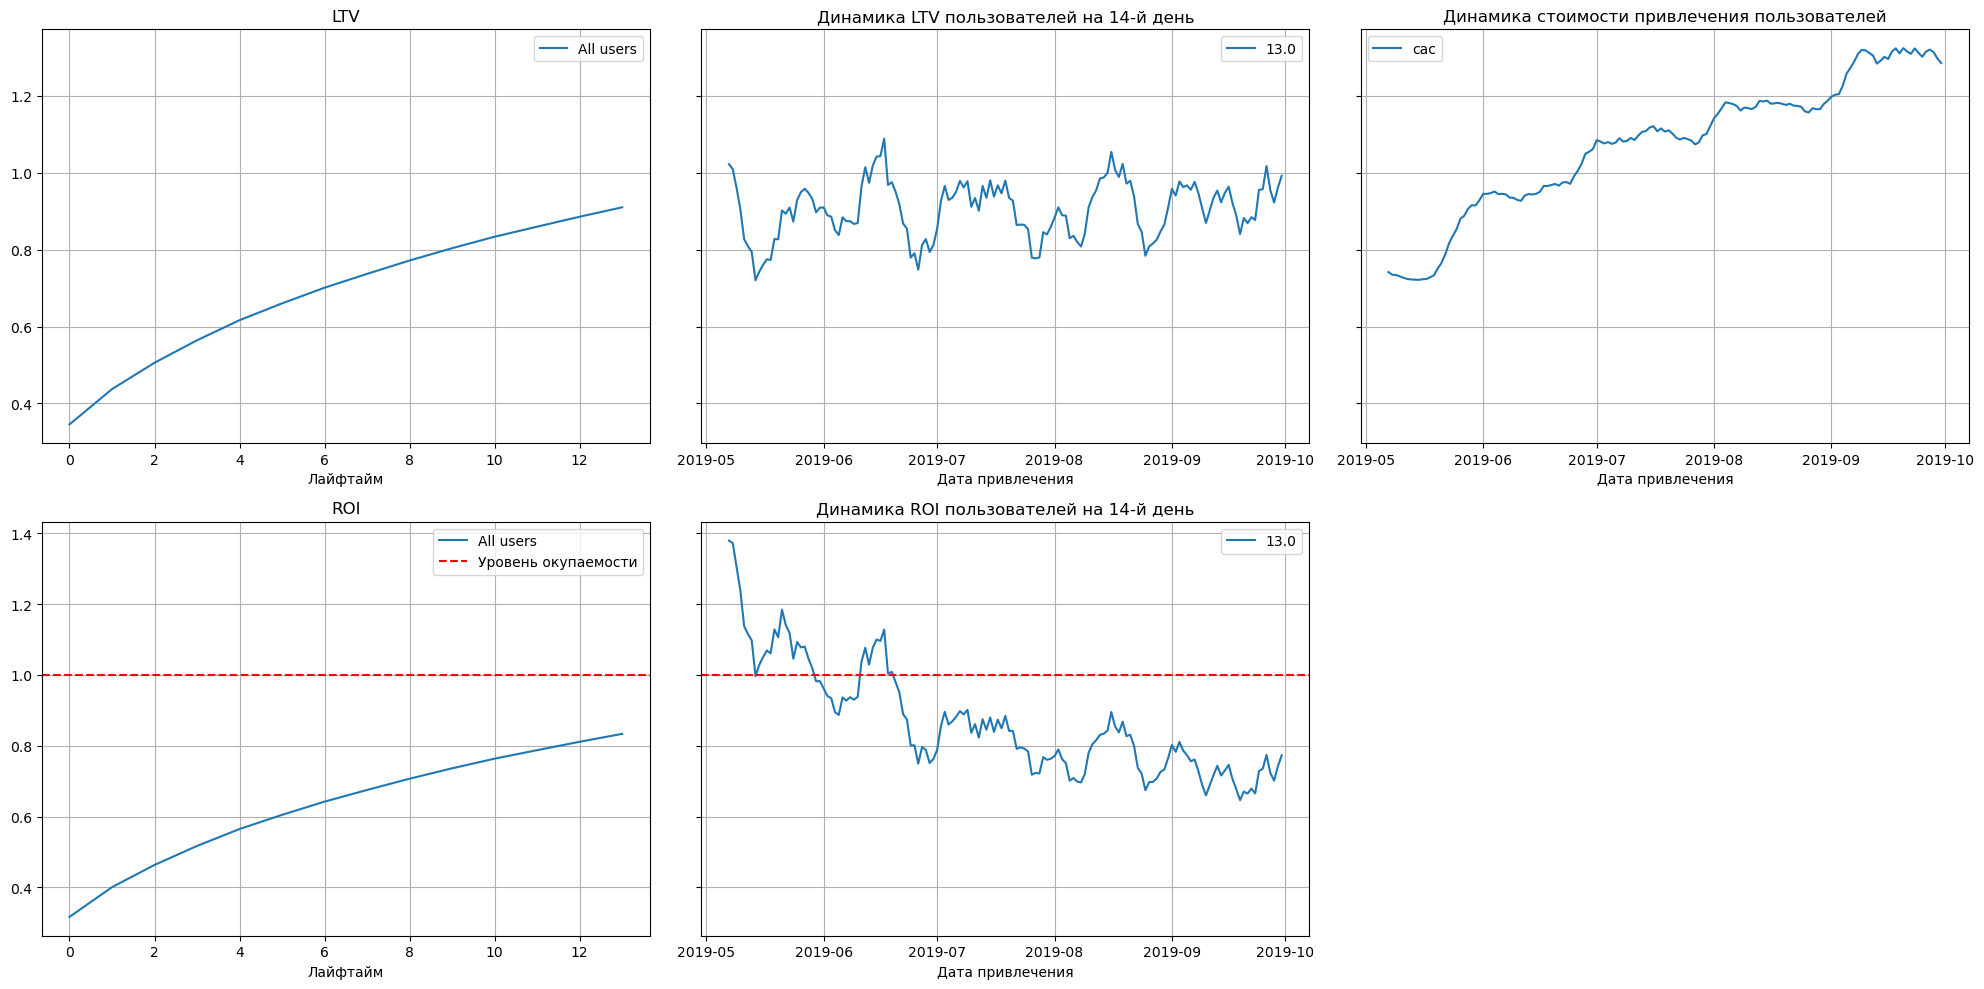

In [45]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon) 

На графиках видно, что привлечение пользователей рекламой не окупается совершенно, хотя и стремися выйти на уровень окупаемости. Однако, принимая во внимание ограничение в 14 дней - в заданном периоде рекламные пользователи не окупаются.

При этом, пожизненная ценность пользователей достаточно высока и колеблется в районе ценности пользователей с максимальным лайфтаймом. Одновременно с этим, динамика стоимости привлечения пользователей имеет восходящий тренд, меняющийся скачкообразно.

Доходность пользователей падает практически с тем же рисунком, с каким возрастает стоимость привлечения. В этой связи необходимо детально разобраться в причинах такого поведения графиков, поскольку имеет место быть предположение о неверно выбранной рекламной стратегии.

#### Оценка удержания и конверсии по регионам, каналам, устройствам

Оценим удержание и конверсию пользователей по регионам, каналам и устройствам и изучим полученные данные.

In [46]:
retention_raw, retention, retention_history  = get_retention(profiles, visits, observation_date, horizon, dimensions=['region'])
retention.head(10)

cohort_size    0         1         2         3         4  \
payer region                                                                    
False France                8776  1.0  0.172174  0.089448  0.051390  0.033728   
      Germany               7450  1.0  0.175570  0.084295  0.056376  0.034765   
      UK                    8779  1.0  0.181570  0.088621  0.052398  0.030755   
      United States        46099  1.0  0.177271  0.085859  0.051107  0.033580   
True  France                 467  1.0  0.466809  0.385439  0.327623  0.316916   
      Germany                409  1.0  0.479218  0.396088  0.310513  0.330073   
      UK                     477  1.0  0.494759  0.429769  0.329140  0.303983   
      United States         5063  1.0  0.356113  0.266245  0.213510  0.184476   

                            5         6         7         8         9  \
payer region                                                            
False France         0.022675  0.018345  0.013674  0.011851  0.010369   
      Germany        0.024698  0.019195  0.014094  0.009933  0.010336   
      UK             0.024376  0.018111  0.016061  0.012074  0.007974   
      United States  0.024751  0.018482  0.013948  0.011584  0.009415   
True  France         0.297645  0.250535  0.239829  0.220557  0.207709   
      Germany        0.254279  0.242054  0.205379  0.237164  0.185819   
      UK             0.280922  0.285115  0.251572  0.190776  0.165618   
      United States  0.170057  0.146356  0.134900  0.127790  0.121865   

                           10        11        12        13  
payer region                                                 
False France         0.007634  0.006381  0.005242  0.005356  
      Germany        0.007114  0.005638  0.007248  0.006980  
      UK             0.007518  0.006948  0.006834  0.004670  
      United States  0.007679  0.006421  0.005944  0.004404  
True  France         0.205567  0.182013  0.194861  0.169165  
      Germany        0.222494  0.166259  0.166259  0.129584  
      UK             0.171908  0.190776  0.186583  0.178197  
      United States  0.117914  0.107841  0.103693  0.092830

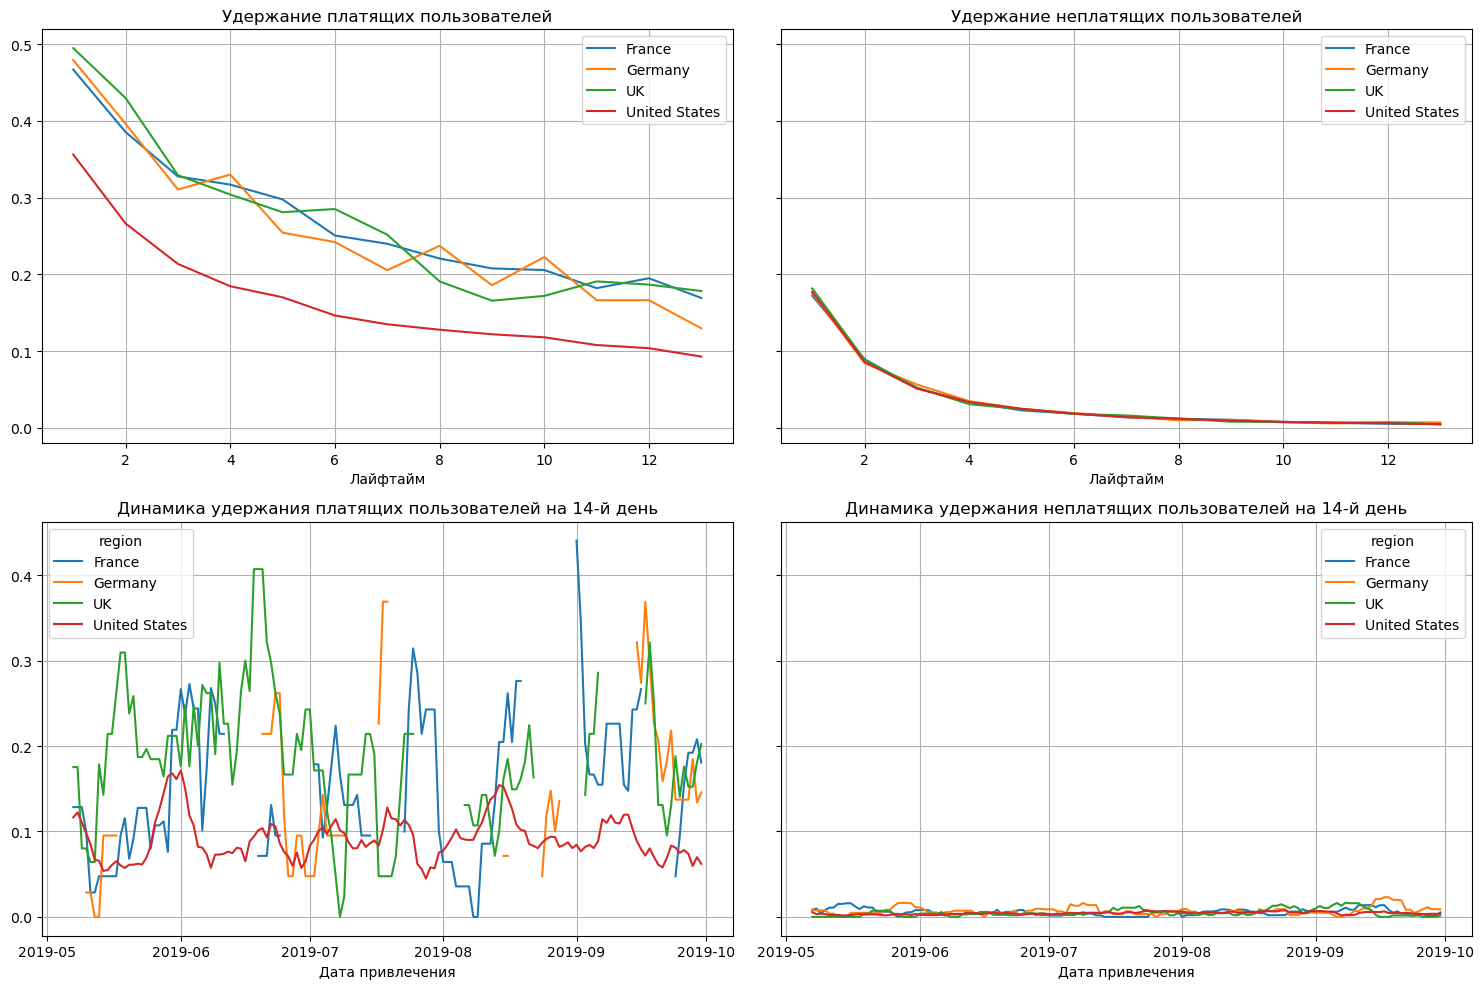

In [47]:
plot_retention(retention, retention_history, horizon, window=7)

In [48]:
conversion_raw, conversion, conversion_history = get_conversion(profiles,orders,observation_date,horizon,dimensions=['region'])
conversion.head(10)

cohort_size       0.0       1.0       2.0       3.0       4.0  \
region                                                                         
France                9243  0.033431  0.037542  0.041329  0.043168  0.044899   
Germany               7859  0.032956  0.039445  0.041990  0.044408  0.045553   
UK                    9256  0.034896  0.040082  0.043107  0.044836  0.046024   
United States        51162  0.071616  0.080548  0.084359  0.087350  0.089559   

                    5.0       6.0       7.0       8.0       9.0      10.0  \
region                                                                      
France         0.045981  0.046846  0.047171  0.047604  0.048253  0.048361   
Germany        0.046825  0.047589  0.048607  0.049370  0.049752  0.049752   
UK             0.047105  0.048293  0.048941  0.049265  0.049481  0.049806   
United States  0.090888  0.091846  0.092862  0.093683  0.094465  0.094953   

                   11.0      12.0      13.0  
region                                       
France         0.048902  0.049118  0.049226  
Germany        0.049879  0.050006  0.050643  
UK             0.049914  0.049914  0.049914  
United States  0.095325  0.095579  0.095931

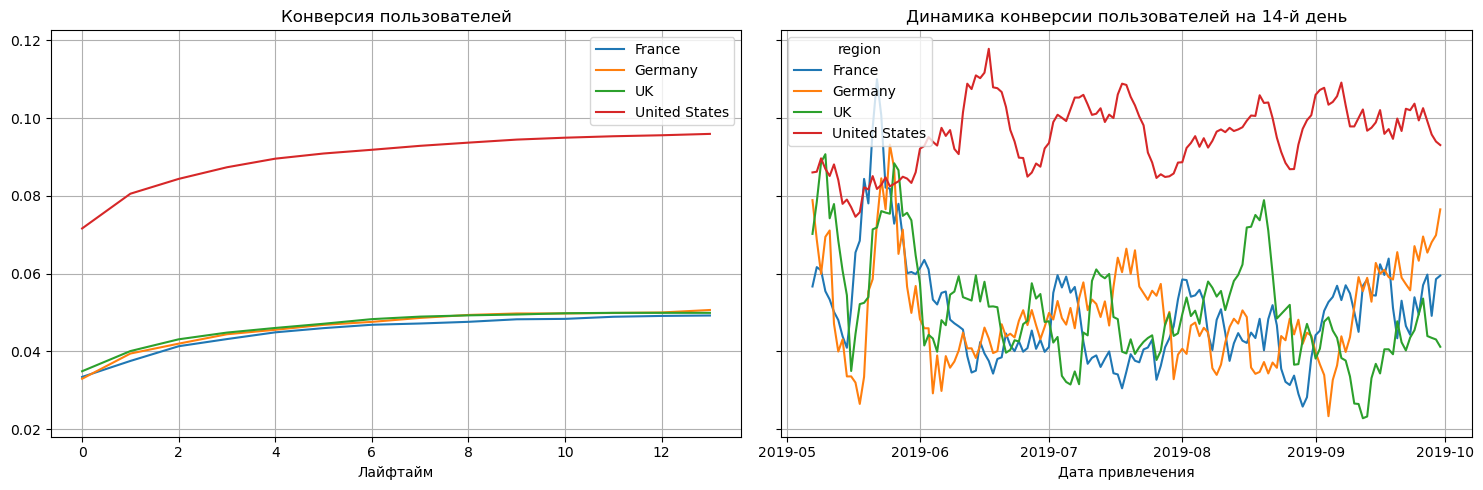

In [49]:
plot_conversion(conversion, conversion_history, horizon, window=7)

В целом, видно, что самое высокое удержание наблюдается у платящих пользователей из Великобритании. Однако, следует обратить внимание, что в США пользователей больше, чем в Великобритании, Германии и Франции в сумме. Также, по графику динамики привлечения наглядно видно, что только в США пользователи приходили в сервис каждый день. Во Франции, Германии и Великобритании были периоды без прихода новых пользователей.

Удержание неплатящих пользователей для всех регионов практически совпадает.

В части конверсии весьма примечательно, что она значительно выше в США, чем в остальных регионах, а во временном выражениии сначала меньше, чем в Европе, а затем значительно выше. Для дальнейших выводов необходимо исследовать эти же параметры по устройствам и каналам привлечения.

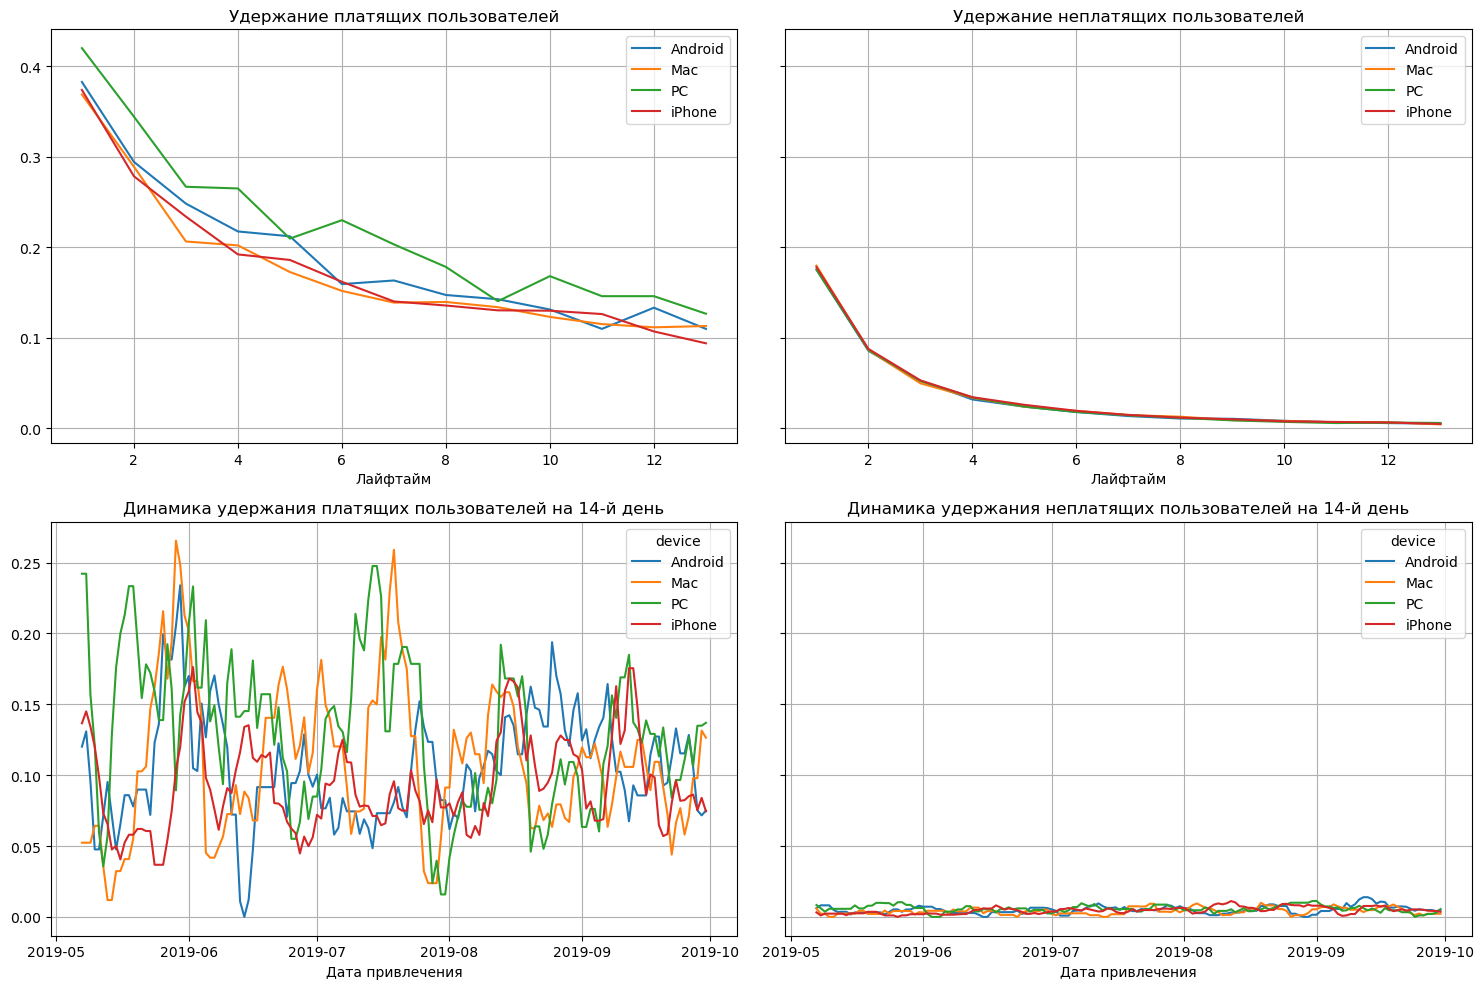

In [50]:
retention_raw_dev, retention_dev, retention_history_dev  = get_retention(profiles, visits, observation_date, horizon, dimensions=['device'])
plot_retention(retention_dev, retention_history_dev, horizon, window=7)

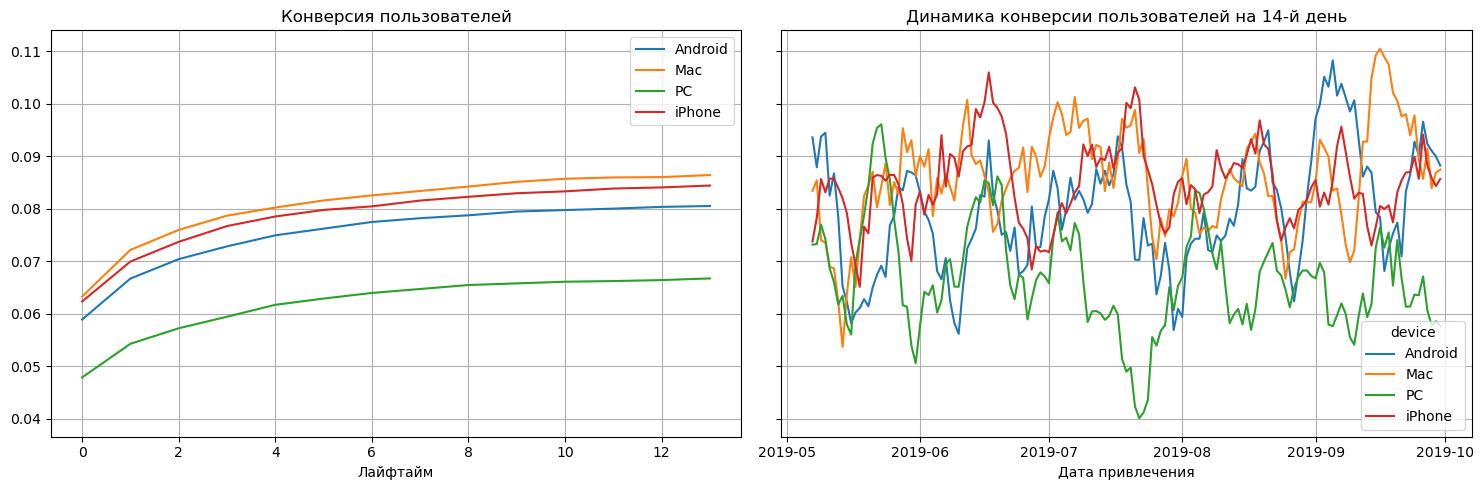

In [51]:
conversion_raw_dev, conversion_dev, conversion_history_dev = get_conversion(profiles,orders,observation_date,horizon,dimensions=['device'])
plot_conversion(conversion_dev, conversion_history_dev, horizon, window=7)

В части используемых устройств среди платящих пользователей, выше всего удержание у пользователей ПК, на втором месте пользователи Android, далее практически сливаясь, идут пользователи устройств от Apple.

В динамике интересно обратить внимание, что с мая по июнь графики удержания пользователей ПК и Mac разнонаправленны, и только с июля динамика их удержания становится достаточно похожей. Графики динамики удержания пользователей Android и iPhone более похожи практически с самого начала исследования.

В свою очередь, конверсия для ПК находится ниже всех остальных устройств, как в общем, так и во временном выражении. При этом, графики изменения конверсии по устройствам Apple двигаются примерно в одинаковой плоскости, расходясь только в самом конце.

В части основных установочных показателей пользователей можно говорить о том, что проблем у сервиса "in general" нет. При этом, пользователи США и конвертируются лучше, и пользуются чаще всего устройствами Apple (см. ранее диаграмму долей устройств по странам). В общем и целом, сервис является востребованным во всех регионах и для всех устройств (со скидкой на платежеспособность пользователей того или иного типа).

Но, раз компания терпит убытки, - значит есть проблемы в маркетинговой кампании, поэтому изучим удержание и конверсию по источникам рекламы, и продолжим исследование.

#### Оценка удержания и конверсии по источникам рекламы

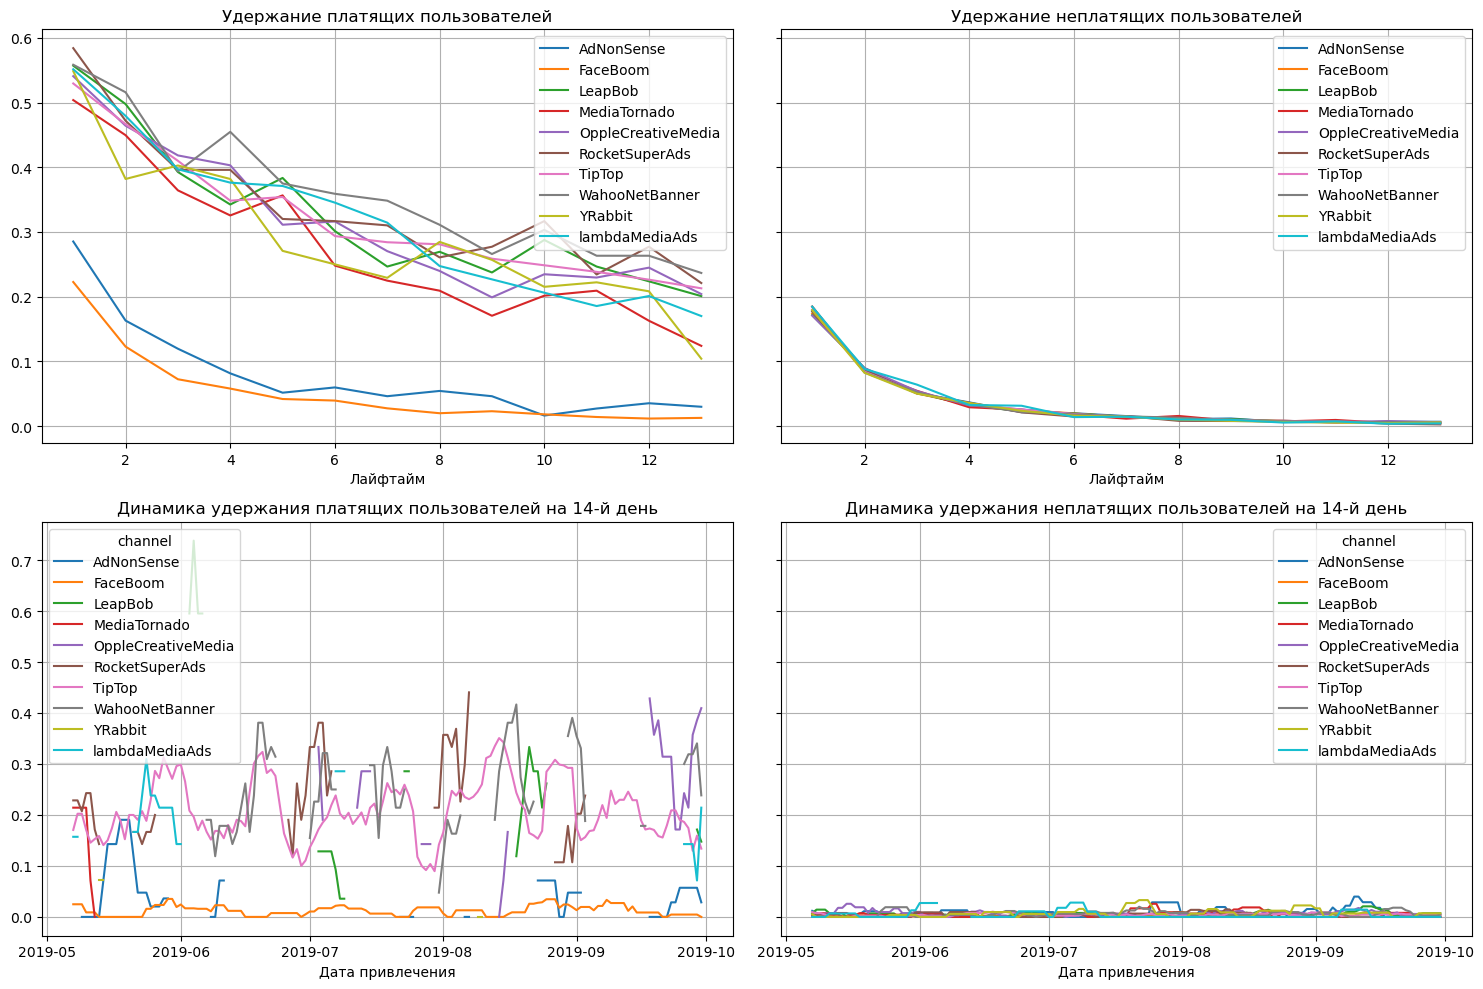

In [52]:
retention_raw_chn, retention_chn, retention_history_chn  = get_retention(profiles, visits, observation_date, horizon, dimensions=['channel'])
plot_retention(retention_chn, retention_history_chn, horizon, window=7)

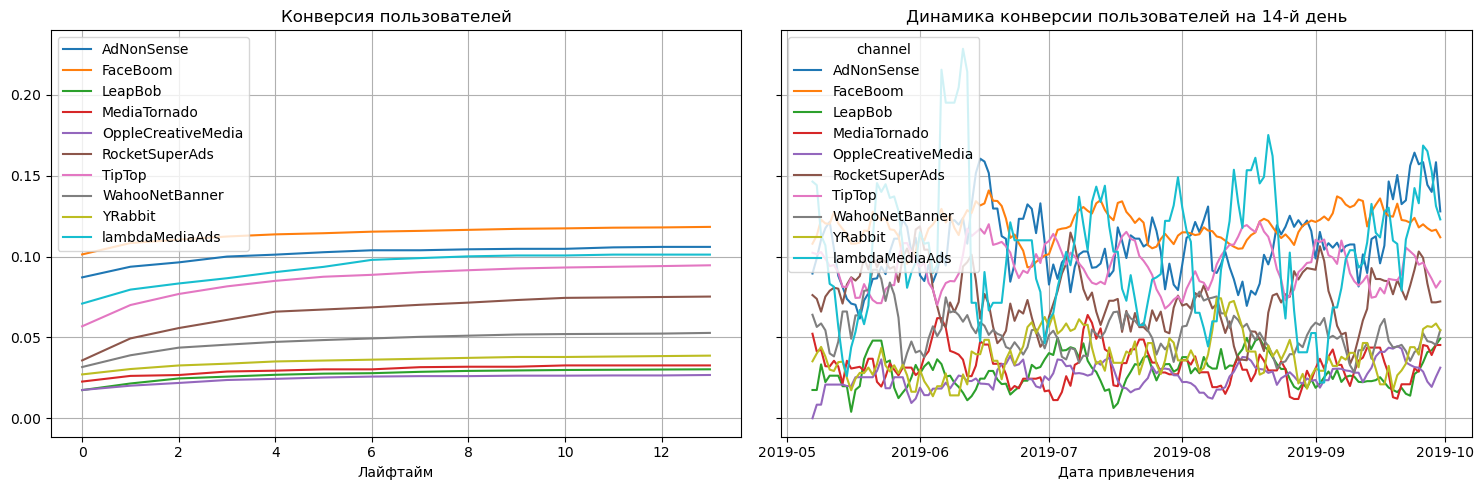

In [53]:
conversion_raw_chn, conversion_chn, conversion_history_chn = get_conversion(profiles,orders,observation_date,horizon,dimensions=['channel'])
plot_conversion(conversion_chn, conversion_history_chn, horizon, window=7)

Изучая конверсию и удержание по рекламе, ситуация становится все интереснее и интереснее. Удержание для FaceBoom самое низкое, но одновременно с этим конверсия самая высокая среди всех источников. Аналогичная история прослеживается и с AdNonSense. 

При этом, можно явно увидеть по динамике удержания основные каналы привлечения, на которых сосредоточилась рекламная кампания - FaceBoom и TipTop: по этим источникам привлечения графики удержания непрерывны, а значит пользователи из этих сетей приходили каждый день.

Но как так выходит, что сеть с малым удержанием дает конверсию выше, чем сеть с намного б*о*льшим удержанием?

Для этого необходимо исследовать динамику маркетинговых показателей пользователей по всем возможным в нашем случае направлениям.

#### Динамика изменения показателей по устройствам

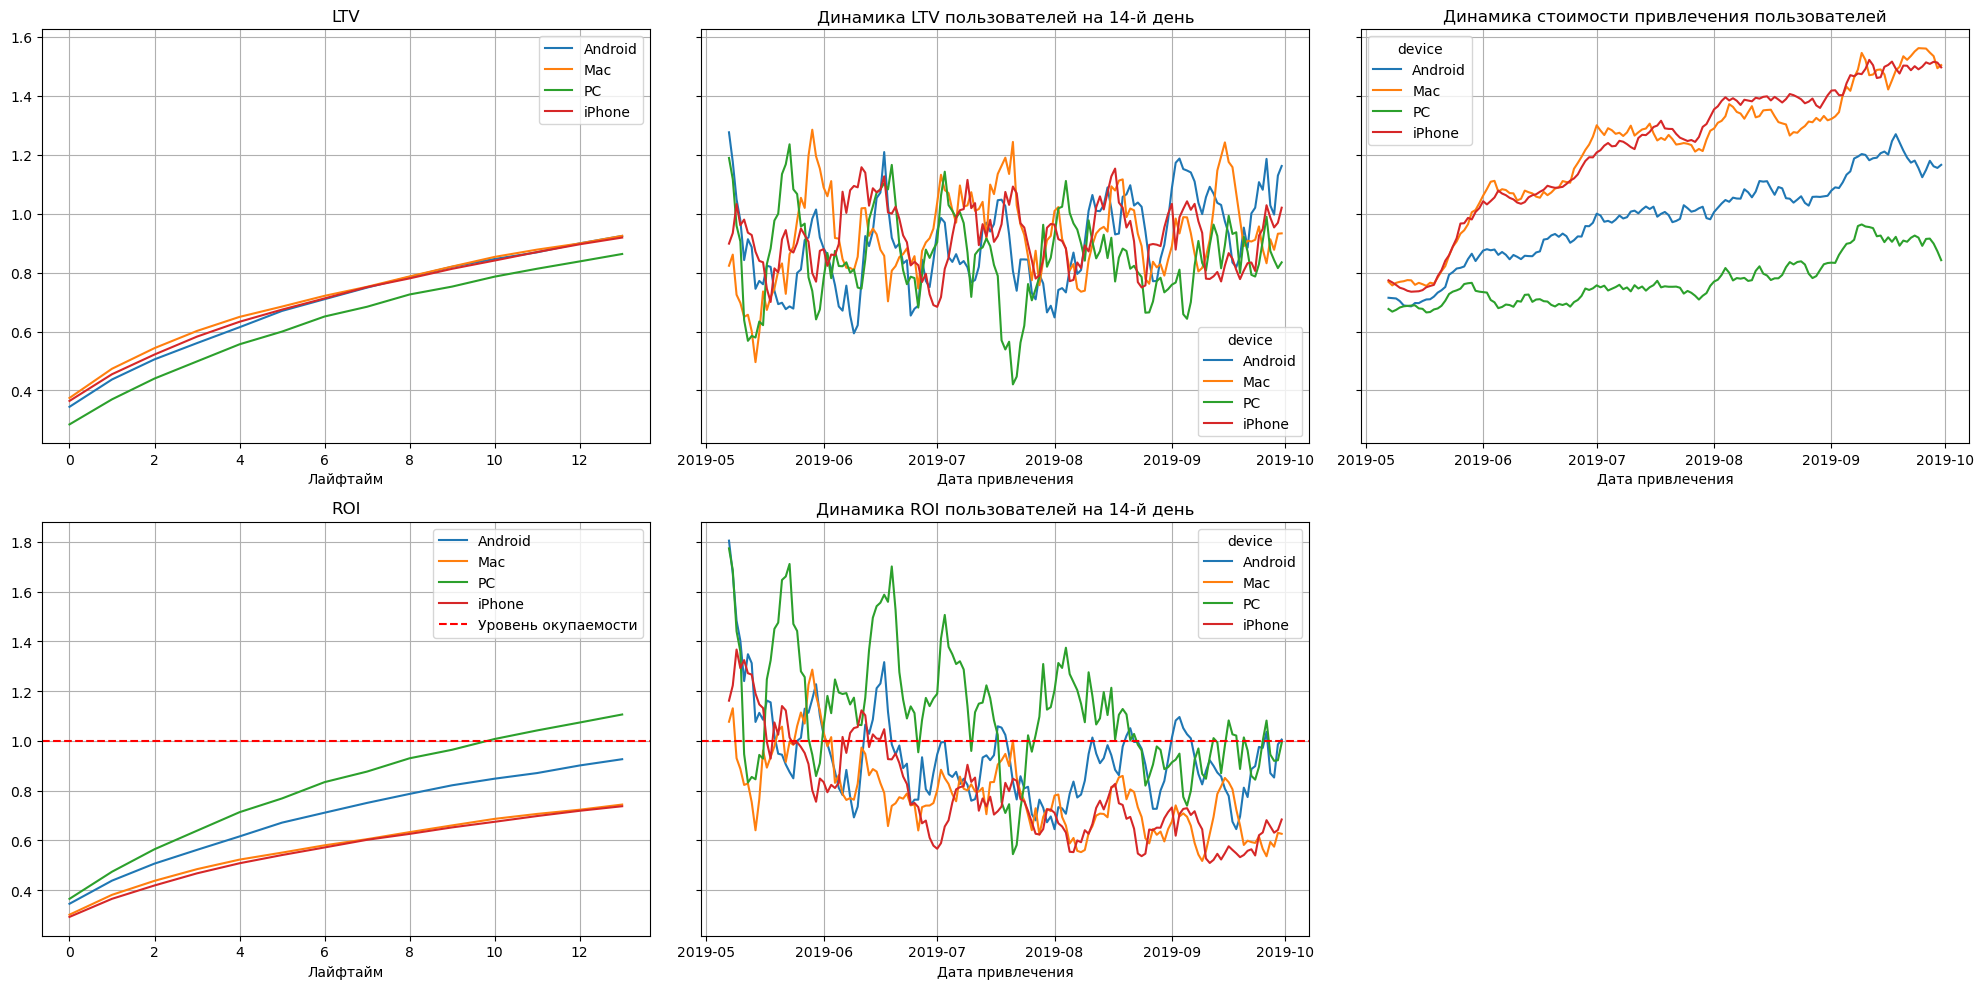

In [54]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon, dimensions=['device']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon) 

В разрезе пользовательских устройств интересно обратить внимание на то, что самые быстроокупаемые - пользователи ПК, которые окупают затраты на свое привлечение уже на 10й день жизни в сервисе, и при этом имеют самую низкую стоимость привлечения. На втором месте - пользователи Android, которые уже не окупаются, но стремятся к этому (имея в виду горизонт анализа - фактически не окупаются). Пользователи Apple за две недели не окупаются вообще и находятся значительно ниже порога окупаемости. При этом стоимость привлечения для них самая высокая и только растет.

Также достаточно любопытно то, что пользователи ПК на начало исследования практически во всем периоде приносят доход компании за вычетом стоимости их привлечения. Пользователи Android также немногим более доходны, чем пользователи мобильных и стационарных "яблок".

В разрезе устройств возможно предположить, что необходимо сместить фокус привлечения в сторону более дешевых для этого пользователей ПК и Android.

#### Динамика изменения показателей по странам

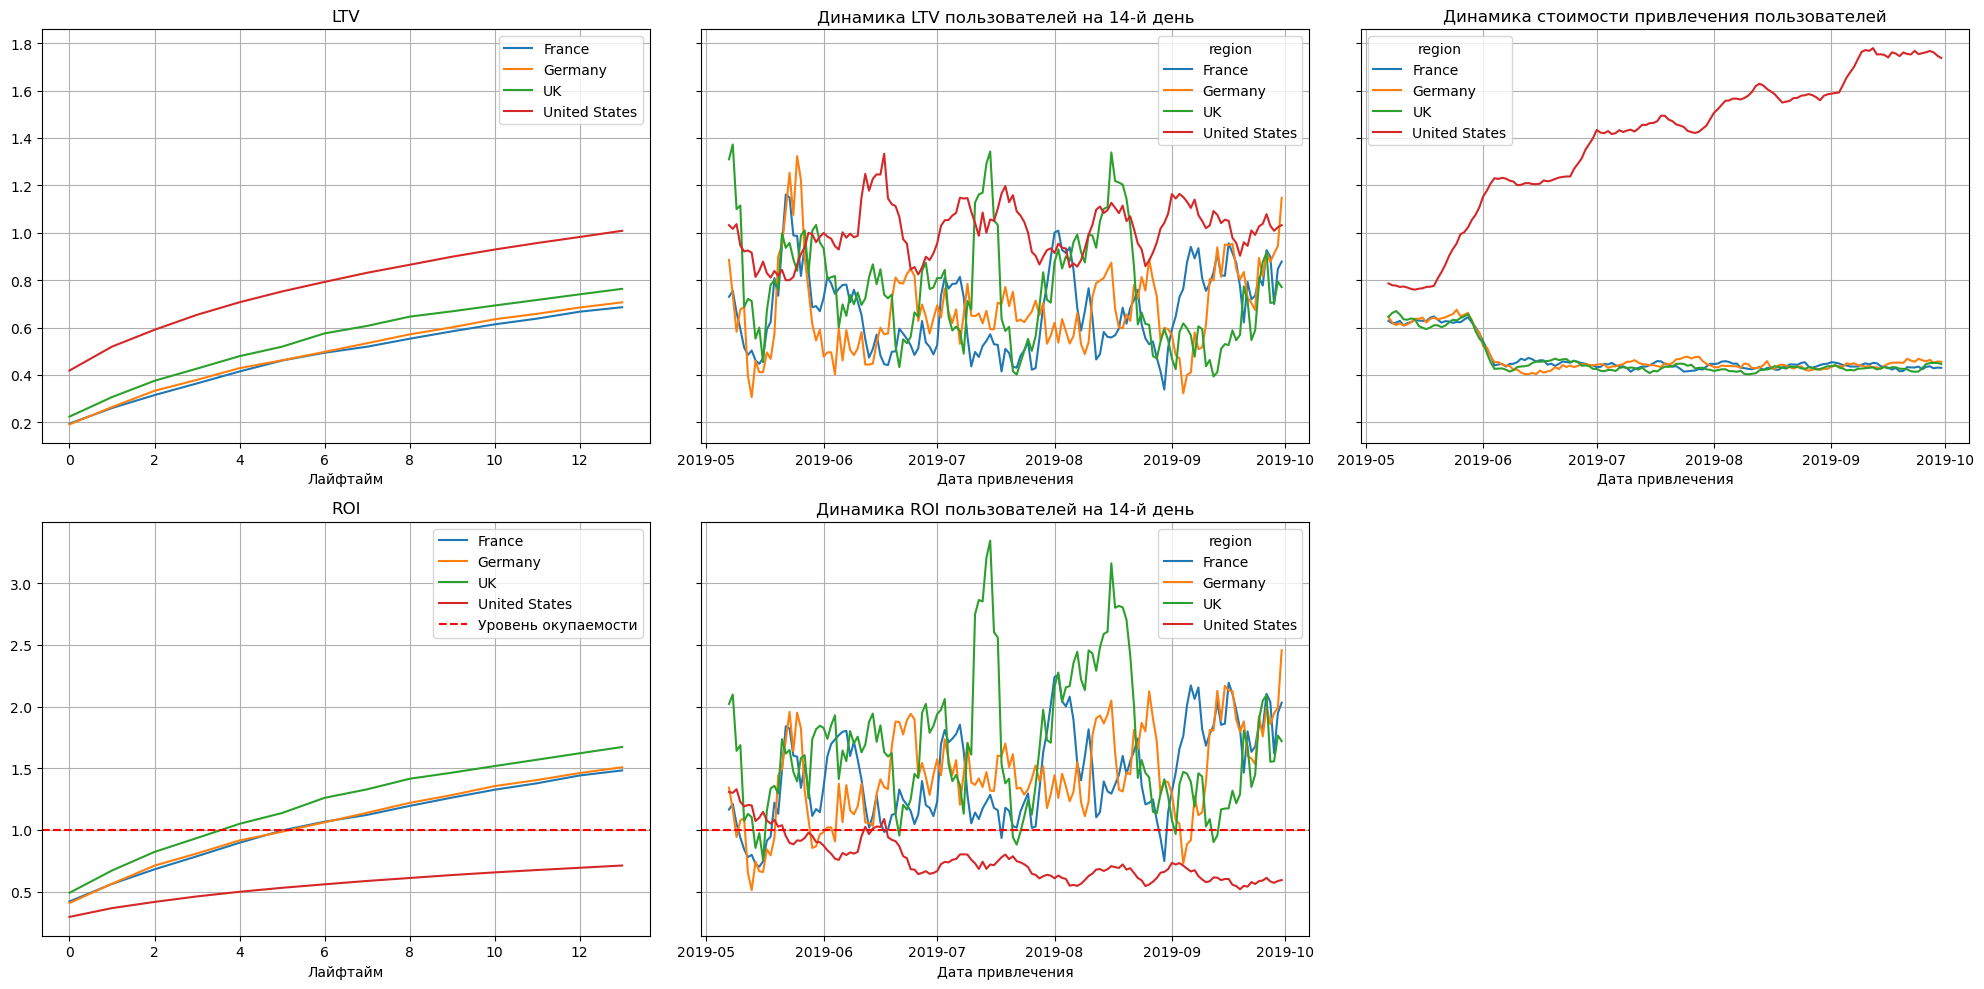

In [55]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon, dimensions=['region']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon) 

*Как говорила Алиса у Льюиса Кэрролла: "Всё чудесатее и чудесатее".*

При рассмотрении показателей по странам, интересно, что стоимость жизни пользователя выше всего для США, но при этом стоимость привлечения такого пользователя единственная растет, в то время как для Старого Света этот показатель практически не изменяется и в июне 2019 года даже немного снижается.

Также и с окупаемостью расходов на привлечение пользователя: клиенты из США - единственные, чья окупаемость со временем только снижается, что генерирует убытки сервису. Учитывая общий состав пользовательской базы и категории их устройств, а также маркетинговые показатели в разрезе устройств, скорее всего, можно предположить, что реклама, ориентированная на пользователей Apple в США критически неэффективна и несет убытки для компании.

#### Динамика изменения показателей по маркетинговым каналам

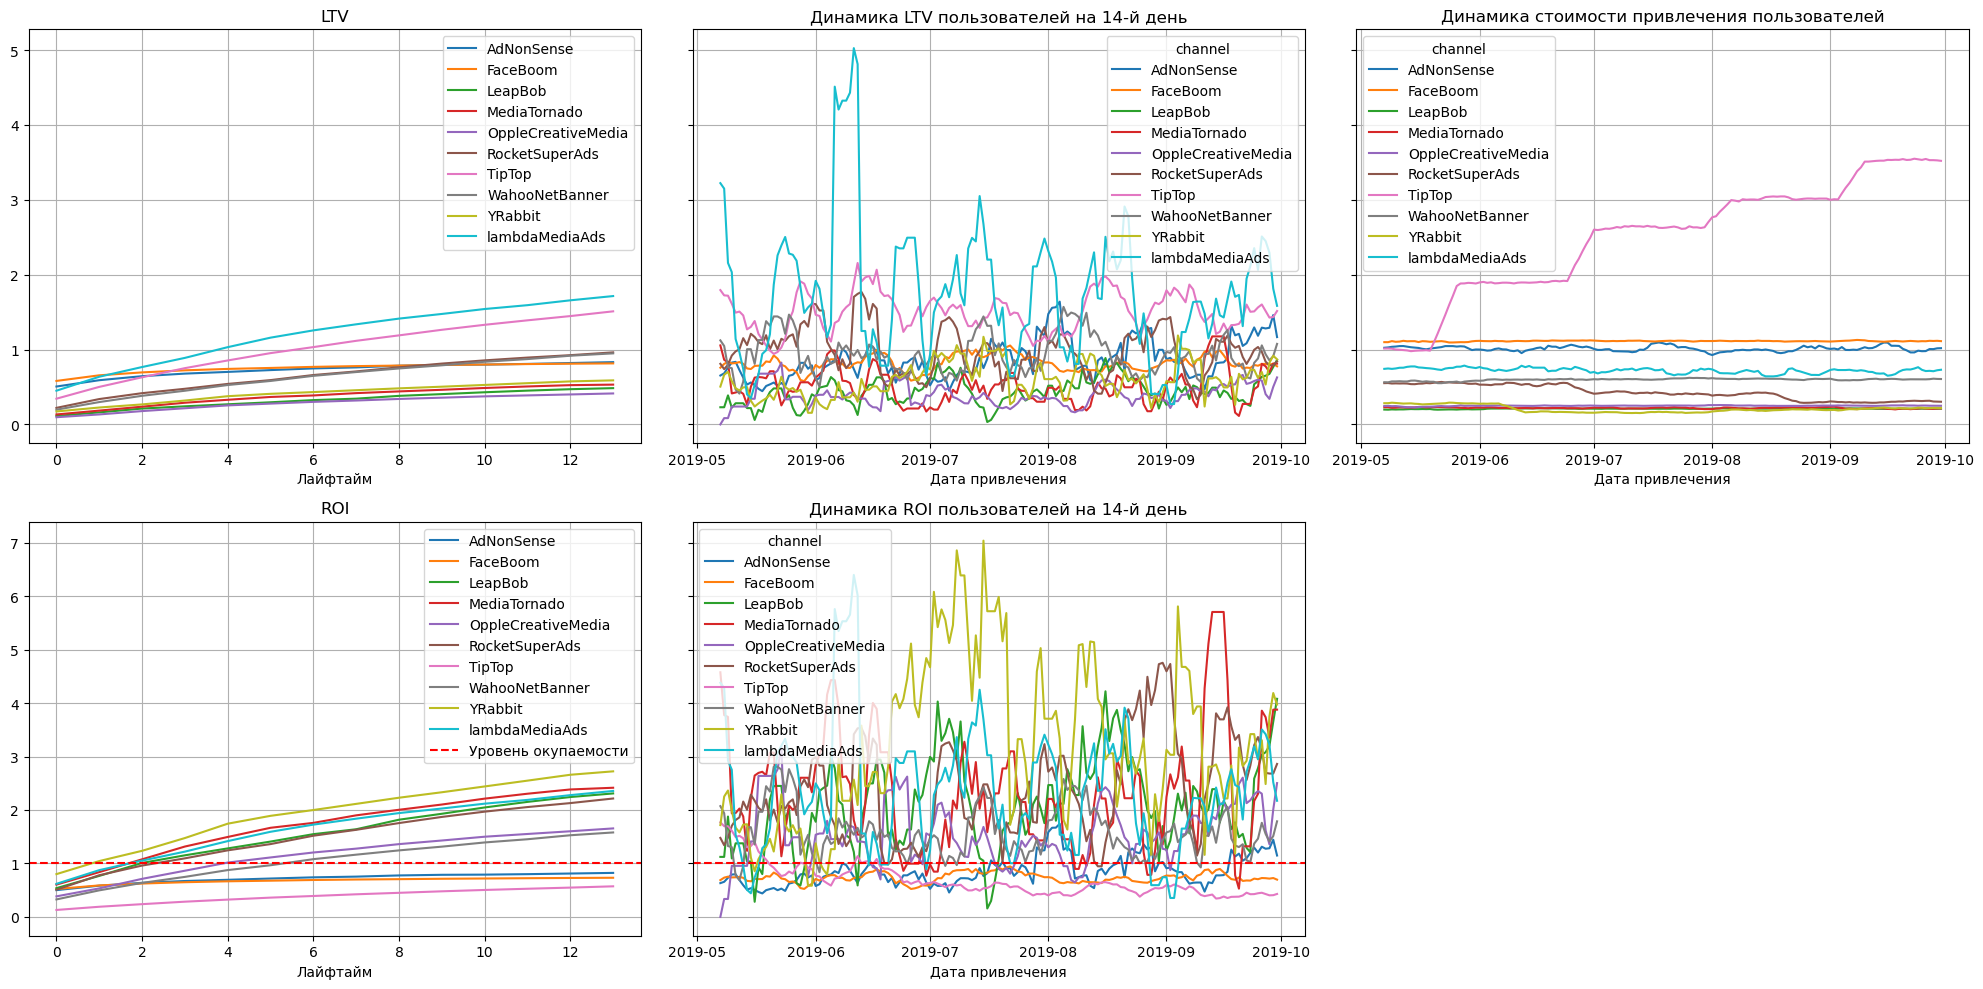

In [56]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon, dimensions=['channel']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon) 

Анализ рекламных каналов показывает, что канал TipTop мало того, что является единственным, в котором стоимость привлечения пользователя растет чуть ли не ежемесячно, так и окупаемость вложений по этому каналу находится на самом низком уровне среди всех остальных каналов.

#### Выводы

Проанализированные маркетинговые показатели говорят о том, что в первую очередь с самим сервисом проблем нет: пользователи в нем удерживаются достаточно, и конверсия, в принципе, тоже достаточна.

Основные проблемы кроются в рекламной политике. 

Канал привлечения TipTop единственный, который показывает стабильный ежемесячный рост стоимости привлечения пользователей. Учитывая, что в итоге по нему пришло меньше людей, чем по каналу FaceBoom, чей аналогичный показатель стоимости привлечения практически не изменяется со временем, есть определенные вопросы к причинам увеличения стоимости без сопутствующего увеличения эффективнсти рекламы. Скорее всего, канал был избран как наиболее перспективный, и в нем было больше всего показов рекламы. Однако у нас нет данных о количестве рекламных показов, в связи с чем со 100%-й долей уверенности так заявлять нельзя.

Пользователи устройств Apple своими покупками не окупают затрат на привлечение. Вместе с пользователями из США. Принимая во внимание, что в США 70% привлеченных пользователей используют устройства Apple, сам собой напрашивается вывод о том, что имеются некие проблемы с позиционированием продукта как для данных устройств, так и для данной страны.

Кроме того, растущая стоимость привлечения в США, в сравнении с остальными странами, говорит о том, что, предположительно, был выбран неверный фокус на аудиторию именно в США. При прочих равных условиях рынки Старого Света кажутся более привлекательными и эффективными. Если добавить к этому иное распределение пользовательских устройств и окупаемость по ним, то Европа становится еще более интересным для развития рынком.

### Общий вывод

#### Причины неэффективности привлечения пользователей

Согласно результатам проведенного исследования, 67% привлеченных пользователей живут в США, остальные 33% - в Европе. Три четверти пользователей из США используют устройства Apple.

При этом установлено, что реклама для США не окупается за 2 недели жизни пользователя, стоимость привлечения одного американца растет со временем, в то время как в Европе она относительно стабильна, а стоимость рекламы в сети TipTop аналогично растет, причем ежемесячно на значительную величину.

Скорее всего, учитывая показатели удержания по странам и устройствам, маркетинговым подразделением было предположено, что сеть TipTop является наиболее перспективной для привлечения пользователей в США (похожий рисунок графиков роста стоимости привлечения в США и роста стоимости привлечения в TipTop неявно на это намекает).

Исходя из этого можно предположить следующие причины неэффективности привлечения:
- Некорректно сформирована рекламная кампания в сети TipTop
- Сервис недостаточно привлекателен для пользователей в США 
- Сервис недостаточно привлекателен для пользователей Apple
- Неверно выбрана фокус-группа в сети TipTop для пользователей из США

Также есть вероятность, что все эти четыре фактора могут быть связаны воедино, но для этого недостаточно информации.

#### Рекомендации для отдела маркетинга

Для исправления ситуации с несомыми компанией убытками необходимо изменить рекламную кампанию для продукта в следующих аспектах:
- Сместить ориентир кампании на Великобританию, Германию и Францию.
- Сместить ориентир кампании на пользователей ПК и Android.
- Изменить позиционирование продукта для пользователей техники Apple.
- Изменить позиционирование продукта для пользователей из США.
- Изменить распределение рекламных расходов в рекламных сетях, перенеся бюджеты из кампании в TipTop в кампанию в FaceBoom.

Также, для более детального исследования самой маркетинговой кампании в разрезе затрат и ориентиров по востребованности в рекламных сетях, необходимо получить данные о количестве рекламных показов в них, методах оплаты рекламы, а также информацию о стоимости одного показа и действия (в зависимости от выбранной модели оплаты) в каждой из рекламных сетей. В случае, если не менялась ценовая политика сети TipTop, а увеличение затрат связано с увеличением показов, необходимо снизить количество рекламных показов в ней, поскольку сеть не приносит сопоставимого с затратами количества новых пользователей.